In [14]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment3/'
FOLDERNAME = 'cs231n/assignments/CS231N_project/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This downloads the COCO dataset to your Drive
# if it doesn't already exist.
%cd /content/drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
!bash get_datasets.sh
%cd /content/drive/My\ Drive/$FOLDERNAME

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/cs231n/assignments/CS231N_project/cs231n/datasets
bash: get_datasets.sh: No such file or directory
/content/drive/My Drive/cs231n/assignments/CS231N_project


In [15]:
# Setup cell.
import numpy as np
import torch
import torch.nn as nn
from torch.nn import init
import torchvision
import torchvision.transforms as T
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from cs231n.gan_pytorch import preprocess_img, deprocess_img, rel_error, count_params, ChunkSampler

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # Set default size of plots.
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

def show_images(images):
    images = np.reshape(images, [images.shape[0], -1]) # Images reshape to (batch_size, D).
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img.reshape([sqrtimg,sqrtimg]))
    return

answers = dict(np.load('gan-checks.npz'))
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset


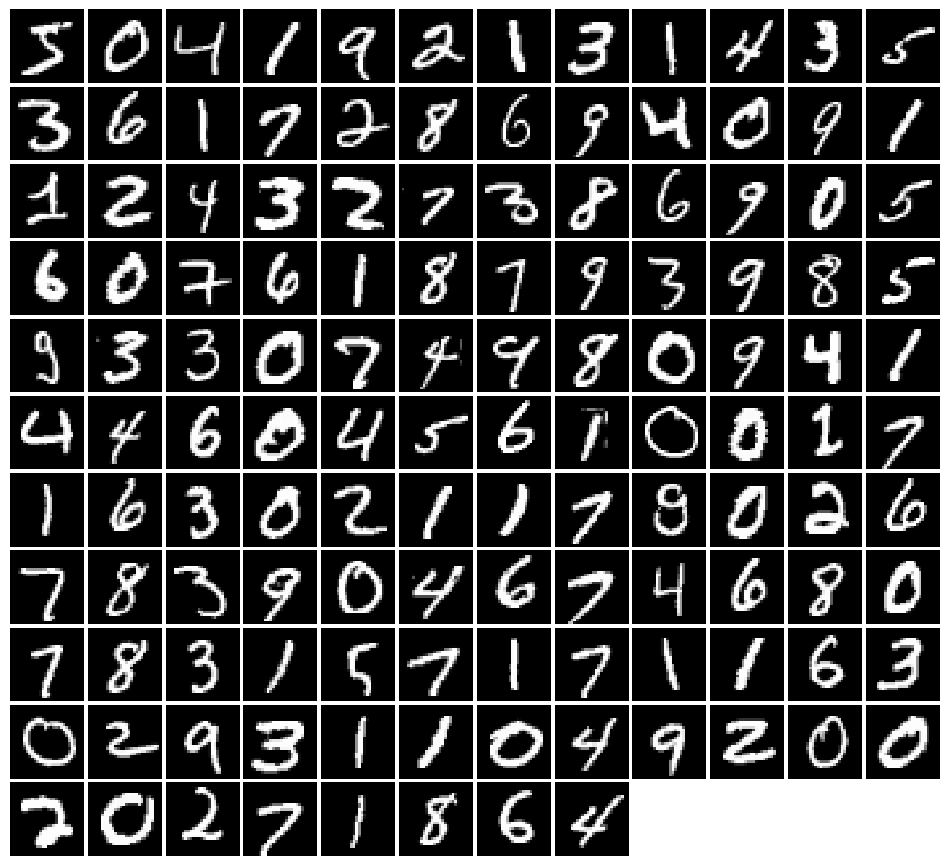

In [16]:
NUM_TRAIN = 50000
NUM_VAL = 5000

NOISE_DIM = 96
batch_size = 128

mnist_train = dset.MNIST(
    './cs231n/datasets/MNIST_data',
    train=True,
    download=True,
    transform=T.ToTensor()
)
loader_train = DataLoader(
    mnist_train,
    batch_size=batch_size,
    sampler=ChunkSampler(NUM_TRAIN, 0)
)

mnist_val = dset.MNIST(
    './cs231n/datasets/MNIST_data',
    train=True,
    download=True,
    transform=T.ToTensor()
)
loader_val = DataLoader(
    mnist_val,
    batch_size=batch_size,
    sampler=ChunkSampler(NUM_VAL, NUM_TRAIN)
)

iterator = iter(loader_train)
imgs, labels = next(iterator)
imgs = imgs.view(batch_size, 784).numpy().squeeze()
show_images(imgs)

## Random Noise


In [17]:
from cs231n.gan_pytorch import sample_noise

def test_sample_noise():
    batch_size = 3
    dim = 4
    torch.manual_seed(231)
    z = sample_noise(batch_size, dim)
    np_z = z.cpu().numpy()
    assert np_z.shape == (batch_size, dim)
    assert torch.is_tensor(z)
    assert np.all(np_z >= -1.0) and np.all(np_z <= 1.0)
    assert np.any(np_z < 0.0) and np.any(np_z > 0.0)
    print('All tests passed!')

test_sample_noise()

All tests passed!


In [18]:
from cs231n.gan_pytorch import Flatten, Unflatten, initialize_weights

In [ ]:
from cs231n.gan_pytorch import get_optimizer, run_a_gan
from cs231n.gan_pytorch import generator as Q
from cs231n.gan_pytorch import discriminator as T
from cs231n.gan_pytorch import f_discriminator_loss as T_loss
from cs231n.gan_pytorch import f_generator_loss as Q_loss

T = T().type(dtype)
Q = Q().type(dtype)

T_solver = get_optimizer(T)
Q_solver = get_optimizer(Q)

images = run_a_gan(
    T,
    Q,
    T_solver,
    Q_solver,
    T_loss,
    Q_loss,
    loader_train
)

Iter: 0, D: -0.05717, G:0.03499
Iter: 250, D: -1.144e+03, G:0.9869
Iter: 500, D: 49.92, G:-41.14
Iter: 750, D: -15.11, G:-2.127
Iter: 1000, D: -2.069e+05, G:-361.8
Iter: 1250, D: -2.601e+06, G:-52.29
Iter: 1500, D: -6.421e+06, G:-5.129e+03
Iter: 1750, D: -1.136e+07, G:-3.862
Iter: 2000, D: -1.672e+07, G:-1.312e+04
Iter: 2250, D: -1.788e+07, G:-18.91
Iter: 2500, D: -1.828e+07, G:-142.4
Iter: 2750, D: -1.897e+07, G:-610.9
Iter: 3000, D: -1.985e+07, G:-629.0
Iter: 3250, D: -2.119e+07, G:-703.7
Iter: 3500, D: -2.197e+07, G:-886.4
Iter: 3750, D: -2.416e+07, G:-1.055e+03


Iter: 0


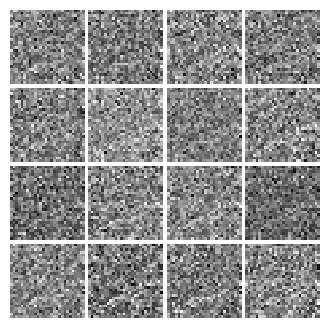


Iter: 250


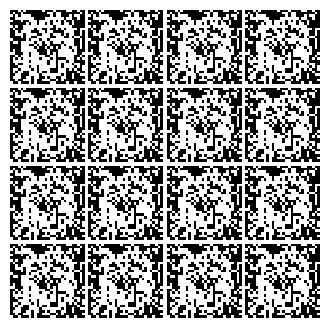


Iter: 500


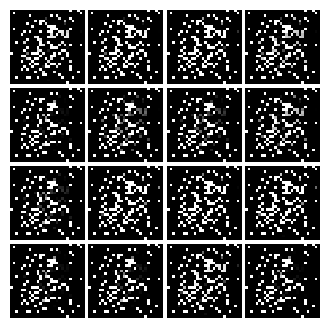


Iter: 750


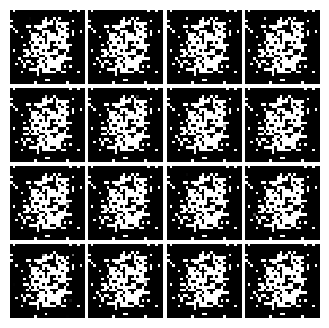


Iter: 1000


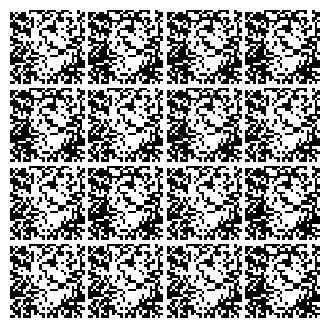


Iter: 1250


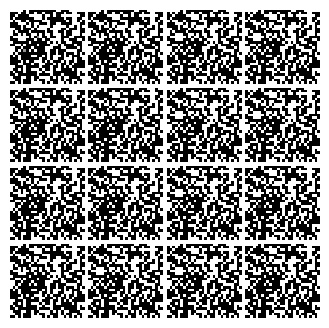


Iter: 1500


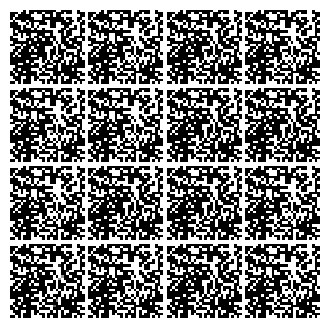


Iter: 1750


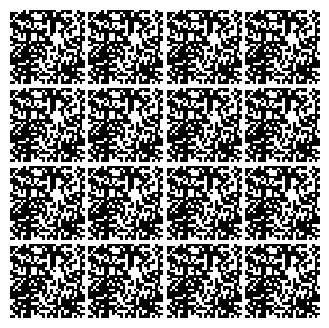


Iter: 2000


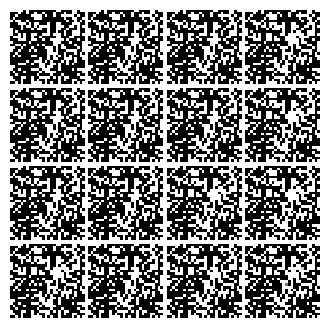


Iter: 2250


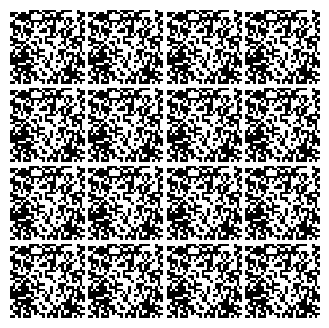


Iter: 2500


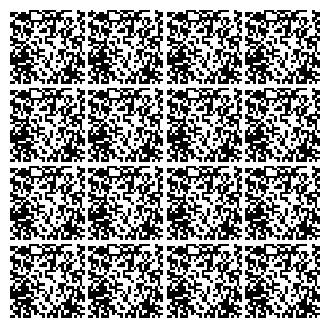


Iter: 2750


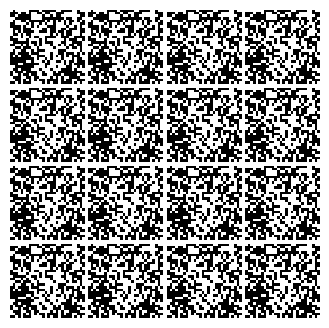


Iter: 3000


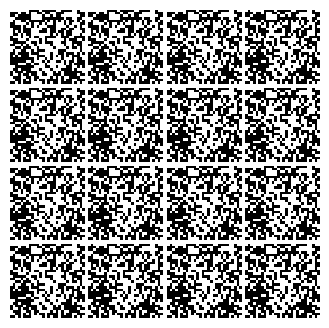


Iter: 3250


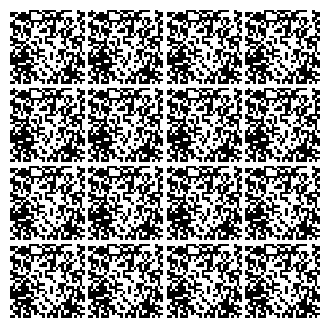


Iter: 3500


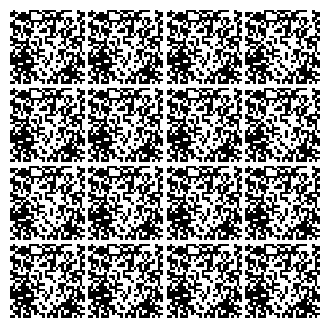


Iter: 3750


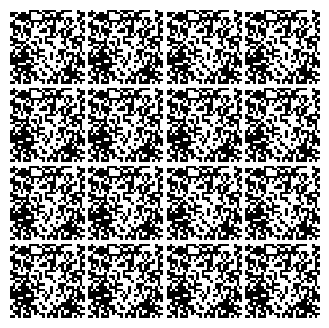

In [ ]:
numIter = 0
for img in images:

    print("Iter: {}".format(numIter))
    show_images(img)
    plt.show()
    numIter += 250
    print()

DCGAN final image:


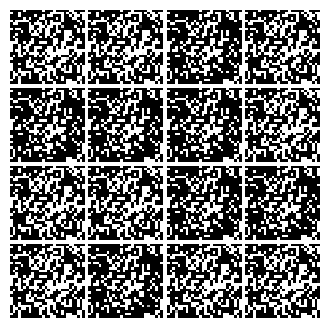

In [ ]:
# This output is your answer.
print("DCGAN final image:")
show_images(images[-1])
plt.show()

In [ ]:
from cs231n.gan_pytorch import build_dc_generator as Q
from cs231n.gan_pytorch import build_dc_classifier as T
from cs231n.gan_pytorch import f_discriminator_loss as T_loss
from cs231n.gan_pytorch import f_generator_loss as Q_loss
from cs231n.gan_pytorch import get_optimizer, run_a_gan

T = T(batch_size).type(dtype)
T.apply(initialize_weights)
Q = Q().type(dtype)
Q.apply(initialize_weights)

T_solver = get_optimizer(T)
Q_solver = get_optimizer(Q)

images = run_a_gan(
    T,
    Q,
    T_solver,
    Q_solver,
    T_loss,
    Q_loss,
    loader_train,
    num_epochs=5
)

Iter: 0, D: 0.1879, G:0.6635
Iter: 250, D: -0.5407, G:0.5187
Iter: 500, D: -0.5286, G:0.2686
Iter: 750, D: -0.8901, G:-0.4897
Iter: 1000, D: -0.1695, G:0.06448
Iter: 1250, D: -0.4335, G:0.01294
Iter: 1500, D: -0.2398, G:0.01477
Iter: 1750, D: -0.9748, G:-1.383


Iter: 0


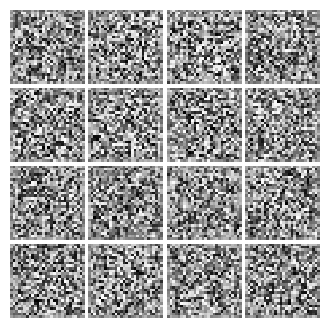


Iter: 250


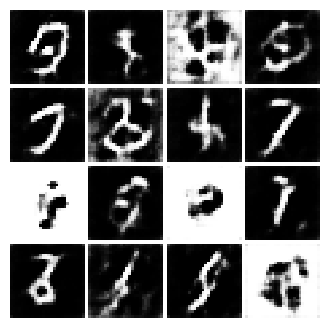


Iter: 500


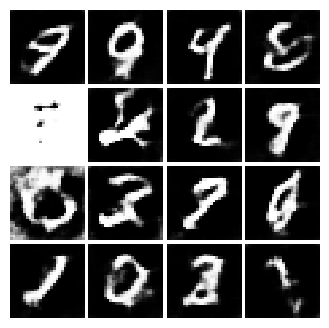


Iter: 750


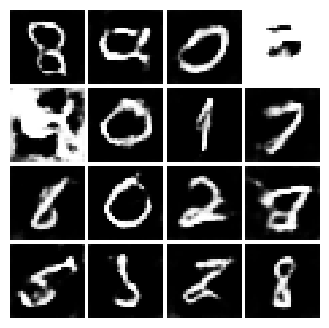


Iter: 1000


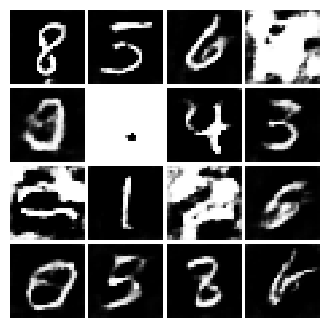


Iter: 1250


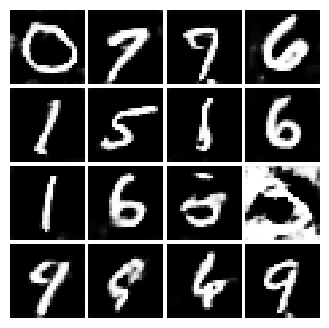


Iter: 1500


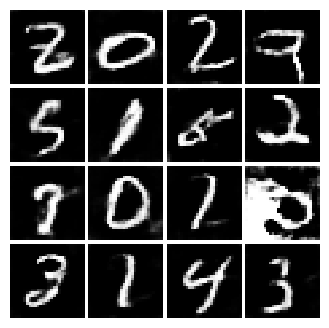


Iter: 1750


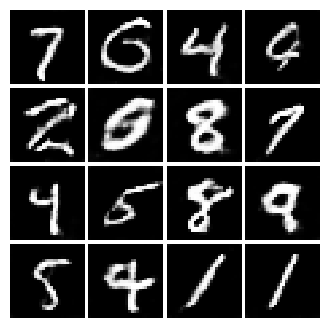

In [ ]:
numIter = 0
for img in images:

    print("Iter: {}".format(numIter))
    show_images(img)
    plt.show()
    numIter += 250
    print()

DCGAN final image:


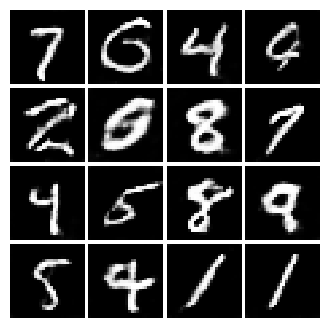

In [ ]:
# This output is your answer.
print("DCGAN final image:")
show_images(images[-1])
plt.show()

##Vanilla GAN using convolutional networks as discriminator and generator

In [19]:
from cs231n.gan_pytorch import build_dc_generator
from cs231n.gan_pytorch import build_dc_classifier
from cs231n.gan_pytorch import discriminator_loss
from cs231n.gan_pytorch import generator_loss
from cs231n.gan_pytorch import get_optimizer, run_a_gan
D_DC = build_dc_classifier(batch_size).type(dtype)
D_DC.apply(initialize_weights)
G_DC = build_dc_generator().type(dtype)
G_DC.apply(initialize_weights)

D_DC_solver = get_optimizer(D_DC)
G_DC_solver = get_optimizer(G_DC)

images = run_a_gan(
    D_DC,
    G_DC,
    D_DC_solver,
    G_DC_solver,
    discriminator_loss,
    generator_loss,
    loader_train,
    num_epochs=5
)

Iter: 0, D: 1.426, G:0.2486
Iter: 250, D: 1.276, G:0.7342
Iter: 500, D: 1.222, G:0.9053
Iter: 750, D: 1.2, G:0.8726
Iter: 1000, D: 1.27, G:0.9424
Iter: 1250, D: 1.265, G:0.8473
Iter: 1500, D: 1.113, G:1.043
Iter: 1750, D: 1.121, G:0.9357


Iter: 0


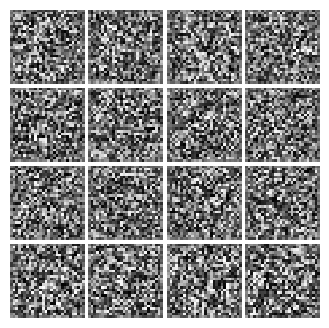


Iter: 250


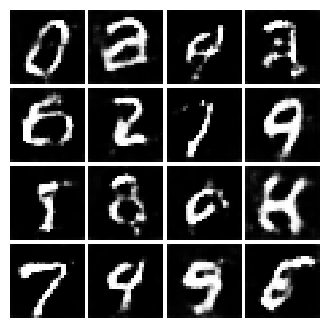


Iter: 500


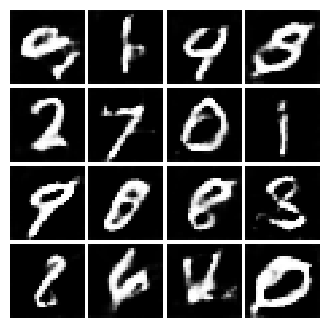


Iter: 750


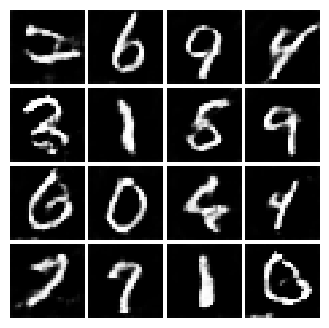


Iter: 1000


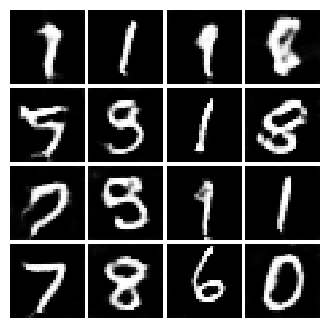


Iter: 1250


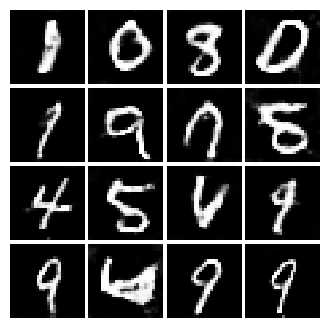


Iter: 1500


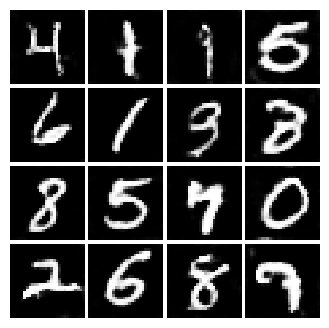


Iter: 1750


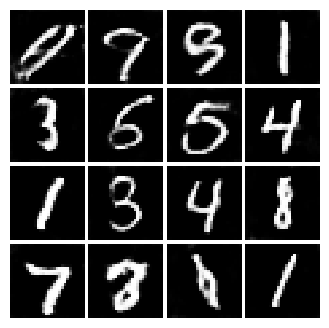

In [20]:
numIter = 0
for img in images:
    print("Iter: {}".format(numIter))
    show_images(img)
    plt.show()
    numIter += 250
    print()

DCGAN final image:


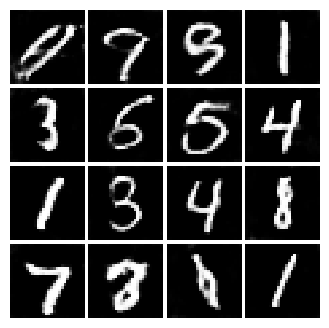

In [21]:
# This output is your answer.
print("DCGAN final image:")
show_images(images[-1])
plt.show()